<a href="https://colab.research.google.com/github/nagamamo/UofMalaya_Seminar/blob/main/1_Python_for_Finance%3A_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1**       **Python for Finance: Introduction**
Mamoru Nagano

Professor of Finance, Seikei University

This seminar will use **Google Colaboratory** to explain the implementation of finance theory using **Python**.

In **Google Colaboratory**, users type source codes from the following address:

https://colab.research.google.com/


For reference, if you want to install and run **Python** on your own PC, please install the program files from the following site.

https://www.python.org/

# 1.1 Pandas datareader



Below, this seminar first introduces how to obtain daily stock price data, interest rate data, and macroeconomic data from external databases of financial information agencies or international organizations.

These data acquisition mainly uses **pandas_datareader**. No package installation is required when using **Google Colab**.

First of all, we need to describe the source code below to import the library. Here, "***data***" is a nickname (something like) when using this library and you can choose any nicknames here.

In [ ]:
import pandas_datareader as data

For example, you can get daily data for the Kuala Lumpur Composite Index from January 2000 to May 2024 by the following source code.

In [ ]:
df=data.DataReader('^KLCI','stooq',start='2000-01-01',end='2024-05-30')

You can take a look at the summary of this data by the following source code.

In [ ]:
df.head()

# 1.2    Data Management: datetime



When acquiring time series data, importing the library **datetime** in advance will simplify the use of **pandas_datareader**.

In [ ]:
import datetime as dt

In [ ]:
start=dt.date(2000,1,1)
end=dt.date(2024,5,30)
df=data.DataReader('^KLCI','stooq',start=start,end=end)
df.head()

# 1.3    Data Retrieval from a CSV File





If you want to retrieve data from a CSV file, type the following codes and click a "file selection" icon appears on the screen below the cell.

Then, select a CSV file from the data folder to retrieve the data.

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

After importing data from a CSV file, it is required to store it in a pandas data frame.

"encoding" is a command that specifies the character code of the file to be read as Shift-JIS or UTF-8 (for Japanese). Index_col=0 specifies that the leftmost column of data is used as the index.

In [ ]:
df_ex = pd.read_csv(('JPN_US_CN.csv'),encoding="Shift-JIS",index_col=0)
df_ex.head()

# 1.4  Data Retrieval from URL



Until now, most of the empirical data has been stored in files on users' PCs using spreadsheet software such as **MS-Excel**. However, in the future, data storage in data science will tend to be uploaded to online storage such as **Google Drive**, **GitHub**, **One Drive**, etc., retrieved from a URL, and shared among developers rather than on individual personal PCs.

In [ ]:
url = "https://github.com/nagamamo/data/blob/main/3_single_factor_data.csv?raw=true"
data = pd.read_csv(url)

# 1.5   Data Management: Pandas



**Pandas** can perform not only numerical calculations but also various data management.

It is especially useful for data preprocessing such as removing missing values, merging two data frames, and input/output of CSV data.

It is also useful for retrieving data with **pandas_datareader** and then visualizing the data using descriptive statistics with describe() or converting the data to percentage change with pct_change.

In [ ]:
import pandas_datareader as data
import pandas as pd
start=dt.date(2000,1,1)
end=dt.date(2024,5,30)
df=data.DataReader('^KLCI','stooq',start=start,end=end).sort_values(by='Date',ascending=True)
df.head()

 If you can store asset price data in a **pandas dataframe**, you can easily calculate returns and risks.

 To calculate the return and risk of an asset, the percentage change from the previous period will be calculated regardless of the frequency of the data, such as daily or weekly using **pandas**.

In [ ]:
df= df.Close.pct_change().dropna()
df.head()

# 1.6 Mean and Variance: Pandas

The average rate of change compared to the previous period is defined as the **average rate of return**, and its standard deviation is the **risk**.

Here's how to calculate **average returns**, **standard deviations**, and other descriptive statistics.

In [ ]:
df_mean= df.mean()
df_median= df.median()
df_std= df.std()
df_var= df.var()
df_max= df.max()
df_min= df.min()
df_all= df.describe()

# 1.7 Data Management: NumPy



**NumPy** is useful for high-speed calculations.

Calculations that would take tens of minutes with pandas can be completed in a few seconds using **NumPy**.

Additionally, there are several libraries that assume **NumPy** arrays for data input and output, such as the machine learning library scikit-learn.

You can store your data directly as a **NumPy** array (**ndarray**), but you can convert it from a pandas dataframe to the ndarray by adding ".values" to the pandas dataframe.

In [ ]:
import numpy as np
nd = df.values

array([-0.00130713, -0.02041306,  0.00322383, ..., -0.00151396,
       -0.00647968, -0.00067898])

# 1.8 Mean and Variance: NumPy

Here's how to use **NumPy** to convert a **pandas dataframe** to **ndarray** and calculate the average rate of return.

In [ ]:
np_mean=np.mean(nd)
nd_median = np.median(nd)
nd_std = np.std(nd)
nd_var = np.var(nd)
nd_max = np.max(nd)
nd_min = np.min(nd)

# 1.9   Probability Distribution Depiction: Matplotlib

Once the** average rate of return** and the **standard deviation** are calculated, a **probability distribution** can be depicted.

Below is the most standard **normal distribution** used in **modern finance theory** using its mean and standard deviation.

If the rate of return of a stochastic variable that follows a **normal distribution** (a variable that fluctuates with a certain probability) denotes x, its mean value is *μ*, and standard deviation is *σ*, then the probability density function *f(x)* can be expressed as:


f(x)=1/√2πσ  exp⁡(-(x-μ)^2/(2σ^2 ))         (-∞<x<∞)

In [ ]:
#[1] Import Libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

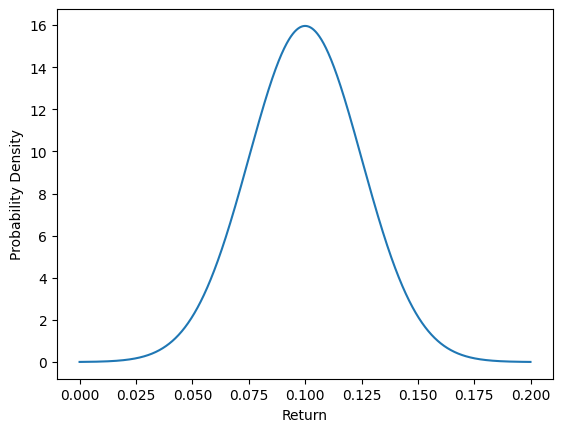

In [ ]:
#[2]Depiction of Normal Distribution
X = np.arange(0, 0.2, 0.0001)
Y = norm.pdf(X, 0.1, 0.025)
plt.xlabel("Return")
plt.ylabel("Probability Density")
plt.plot(X, Y)
plt.show()